In [1]:
import random
import matplotlib.pyplot as plt
import math

In [2]:
def generate_random_ifs(n_transforms):
    transformations = []
    probabilities = []

    for _ in range(n_transforms):
        a, b = random.uniform(-1, 1), random.uniform(-1, 1)
        c, d = random.uniform(-1, 1), random.uniform(-1, 1)
        e, f = random.uniform(-1, 1), random.uniform(-1, 1)

        transformations.append((a, b, c, d, e, f))
        probabilities.append(random.random())

    total = sum(probabilities)
    probabilities = [p / total for p in probabilities]

    return transformations, probabilities

def generate_self_similar_ifs(n_transforms):
    transformations = []
    probabilities = []

    for _ in range(n_transforms):
        # scale = random.uniform(0.2, 0.7)
        scale = random.uniform(0.2, 0.5)
        angle = random.uniform(0, 2 * math.pi)

        a = scale * math.cos(angle)
        b = -scale * math.sin(angle)
        c = scale * math.sin(angle)
        d = scale * math.cos(angle)

        # e = random.uniform(-1, 1)
        # f = random.uniform(-1, 1)
        e = random.uniform(-0.3, 0.3)
        f = random.uniform(-0.3, 0.3)

        transformations.append((a, b, c, d, e, f))
        probabilities.append(random.random())
    total = sum(probabilities)
    probabilities = [p / total for p in probabilities]

    return transformations, probabilities


def apply_transform(x, y, transform):
    a, b, c, d, e, f = transform
    new_x = a * x + b * y + e
    new_y = c * x + d * y + f
    return new_x, new_y

def generate_fractal(transformations, probabilities, n_points=100000):
    """Generate fractal points using an IFS."""
    x, y = 0, 0
    points = []

    for _ in range(n_points):
        transform = random.choices(transformations, weights=probabilities, k=1)[0]
        x, y = apply_transform(x, y, transform)
        points.append((x, y))

    return points


In [3]:
import numpy as np
from scipy.optimize import fsolve

def calculate_scaling_factors(transformations):
    scaling_factors = []
    for t in transformations:
        a, b, c, d, _, _ = t
        singular_values = np.linalg.svd([[a, b], [c, d]], compute_uv=False)
        scaling_factors.append(max(singular_values))
    return scaling_factors

def similarity_dimension(scaling_factors):
    def equation(D):
        return sum(s ** D for s in scaling_factors) - 1
    D_initial_guess = 1.0
    D_solution = fsolve(equation, D_initial_guess)
    return D_solution[0]

In [4]:
def show_results(transformations, probabilities):
    points = generate_fractal(transformations, probabilities, n_points=100000)

    x_coords, y_coords = zip(*points)

    plt.figure(figsize=(5, 5))
    plt.scatter(x_coords, y_coords, s=0.1, color="black")
    plt.axis("off")
    plt.title("Random Fractal Generated by IFS")
    plt.show()

    scaling_factors = calculate_scaling_factors(transformations)

    dimension = similarity_dimension(scaling_factors)
    print(f"Approximate Fractal Dimension: {dimension:.4f}")

In [5]:
# from frak import generate_self_similar_ifs, show_results

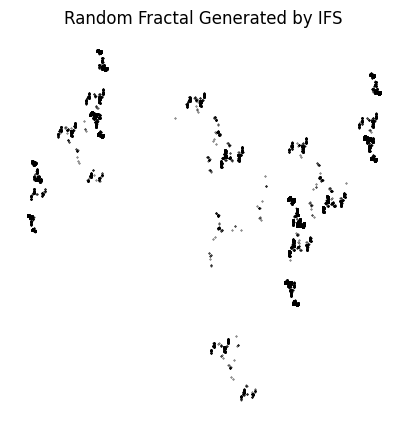

Approximate Fractal Dimension: 1.1328


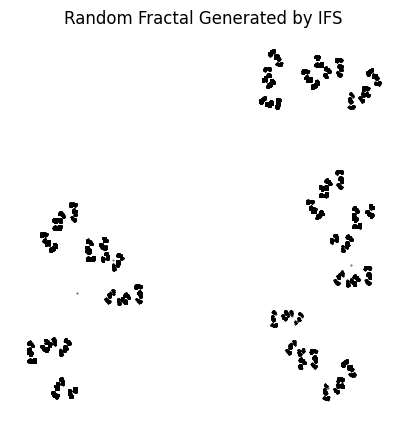

Approximate Fractal Dimension: 1.1178


In [6]:
n_transforms = 3
for i in range(1,3):
    transformations, probabilities = generate_self_similar_ifs(n_transforms)
    show_results(transformations, probabilities)

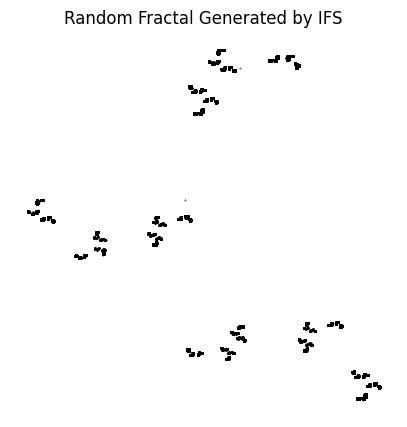

Approximate Fractal Dimension: 0.8824


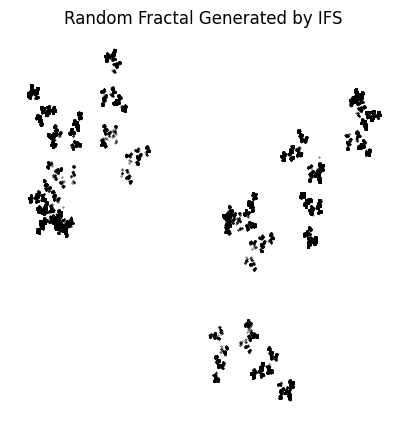

Approximate Fractal Dimension: 1.2554


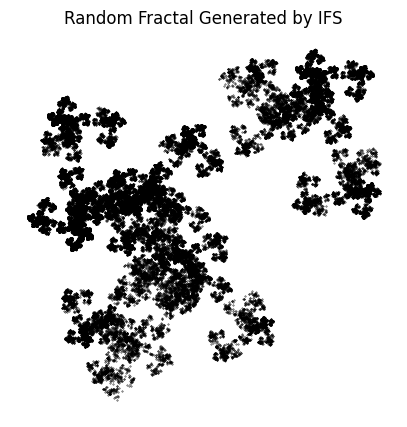

Approximate Fractal Dimension: 1.7934


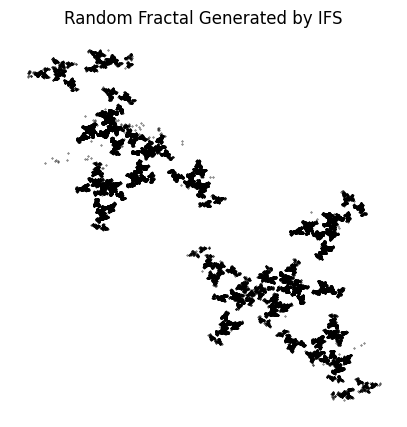

Approximate Fractal Dimension: 1.6061


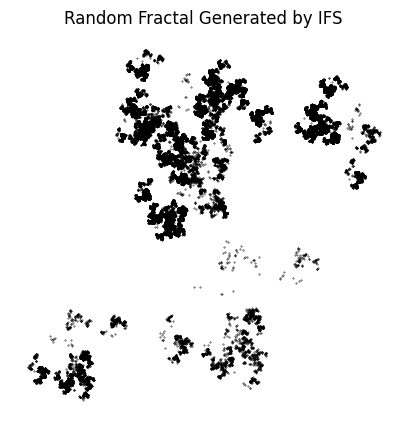

Approximate Fractal Dimension: 1.6476


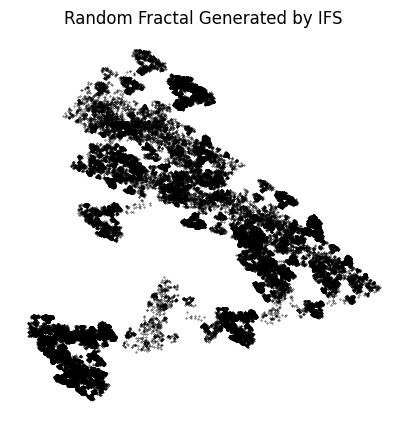

Approximate Fractal Dimension: 2.0420


In [7]:
for i in range(3,9):
    transformations, probabilities = generate_self_similar_ifs(i)
    show_results(transformations, probabilities)

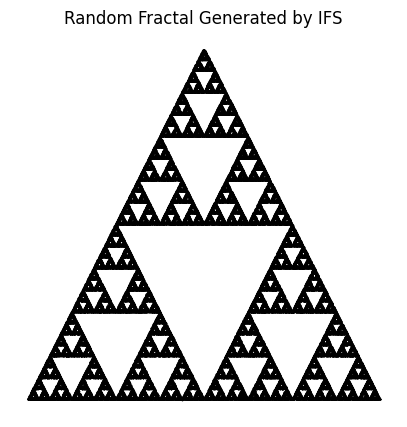

Approximate Fractal Dimension: 1.5850


In [8]:
#SIERPINSKI'S TRIANGLE
#expected dim = 1.585
transformations = [
    (0.5, 0.0, 0.0, 0.5, 0.0, 0.0),
    (0.5, 0.0, 0.0, 0.5, 0.5, 0.0),
    (0.5, 0.0, 0.0, 0.5, 0.25, 0.433),
]
probabilities = [1 / len(transformations)] * len(transformations)
show_results(transformations, probabilities)

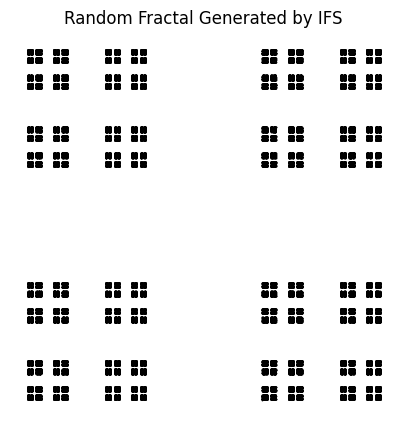

Approximate Fractal Dimension: 1.2619


In [9]:
# CANTOR DUST
# Expected dim = 1.26186
transformations = [
    (1/3, 0.0, 0.0, 1/3, 0.0, 0.0),
    (1/3, 0.0, 0.0, 1/3, 2/3, 0.0),
    (1/3, 0.0, 0.0, 1/3, 0.0, 2/3),
    (1/3, 0.0, 0.0, 1/3, 2/3, 2/3),
]
probabilities = [1 / len(transformations)] * len(transformations)
show_results(transformations, probabilities)

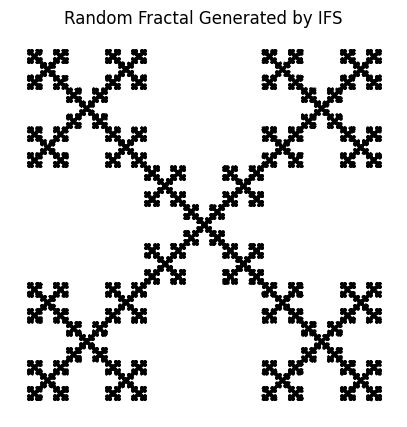

Approximate Fractal Dimension: 1.4650


In [10]:
# VICSEK FRACTAL
# Expected dim = log(5)/log(3) = 1.465
transformations = [
    (1/3, 0.0, 0.0, 1/3, 0.0, 0.0),
    (1/3, 0.0, 0.0, 1/3, 2/3, 0.0),
    (1/3, 0.0, 0.0, 1/3, 1/3, 1/3),
    (1/3, 0.0, 0.0, 1/3, 0.0, 2/3),
    (1/3, 0.0, 0.0, 1/3, 2/3, 2/3),
]
probabilities = [1 / len(transformations)] * len(transformations)
show_results(transformations, probabilities)